In [2]:
### Carga de paquetes y librerias
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf # Framework de deep learning
from tensorflow import keras # API que contiene la mayoría de funciones para las RN

In [3]:
### Cargar datos de fashion mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Verificar dimensiones de los conjuntos de datos de train y val
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
## (60000, 28, 28, 3) : Representación de imágen a color

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
### Valores únicos en y_train
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [5]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

3


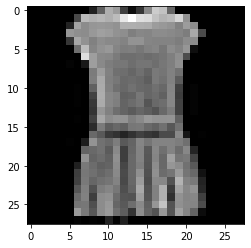

In [7]:
#### Visualizar imágen dentro del conjunto de entrenamiento
plt.imshow(x_train[3], cmap='gray')
print(y_train[3])

In [9]:
### Estandarizar los datos
x_train_new = x_train/255
x_test_new = x_test/255
x_train_new.shape
x_test_new[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08235294,
        0.48235294, 0.42352941, 0.38823529, 0.38823529, 0.32941176,
        0.3254902 , 0.3372549 , 0.36078431, 0.2745098 , 0.02352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.41568627,
        0.97254902, 0.90196078, 0.80392157, 0.9372549 , 0.83137255,
        0.68235294, 0.84313725, 0.81176471, 0.54509804, 0.36470588,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49803922,
        0.84705882, 0.83529412, 0.80392157, 0.83921569, 0.83921569,
        0.75686275, 0.8980

In [12]:
### Tamaño del dataset
filas_img = 28
columnas_img = 28

In [14]:
### Creación de la red neuoral
ann1 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[filas_img, columnas_img]),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
    ]
)

2024-04-29 20:05:00.124721: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Funciones de Activación:
- Relu: retornar siempre valores positivos, los negativos los vuelve 0 - con tareas de regresión.
- Sigmoid: Retorna valores entre 0 y 1 - Tareas de clasificación binaria
- Softmax: Clasificación multiclase
- Tanh: Es la mejor funciona en capas ocultas.

In [15]:
### Entrenamiento de red neuronal
ann1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

ann1.fit(x_train_new, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5201 - accuracy: 0.8174
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3903 - accuracy: 0.8603
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3548 - accuracy: 0.8716
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3323 - accuracy: 0.8802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8849
